In [44]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
#importing modules

In [45]:
df=pd.read_csv('housepricedata.csv')

In [46]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [47]:
df=df.dropna()

<AxesSubplot:xlabel='LotArea', ylabel='count'>

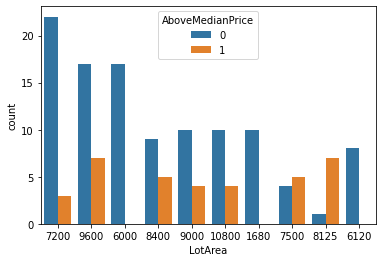

In [48]:
sns.countplot(x='LotArea',hue='AboveMedianPrice',data=df,order=pd.value_counts(df['LotArea']).iloc[:10].index)
#as we go higher in lot area above median price bars increases...taking slice as it would be mess else

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

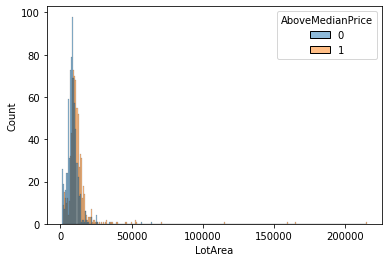

In [49]:
sns.histplot(x='LotArea', hue='AboveMedianPrice',data=df)
#more the better as orange line arre increasing as we go right

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

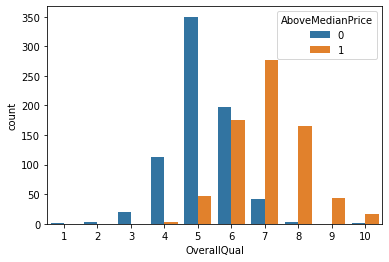

In [50]:
sns.countplot(x='OverallQual',hue='AboveMedianPrice',data=df)
#higher overallqual== above median price increases

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

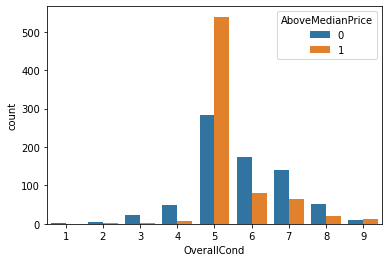

In [51]:
sns.countplot(x='OverallCond',hue='AboveMedianPrice',data=df)
#it reaches peak at 5 and then starts decreasing...we could divide it into two parts >5 or <5 and ==5 for better results

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='count'>

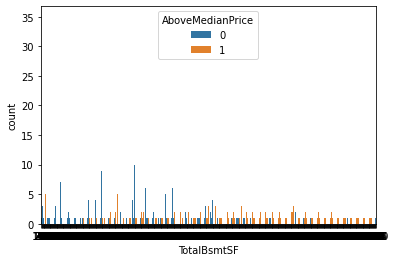

In [52]:
sns.countplot(x='TotalBsmtSF',hue='AboveMedianPrice',data=df)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

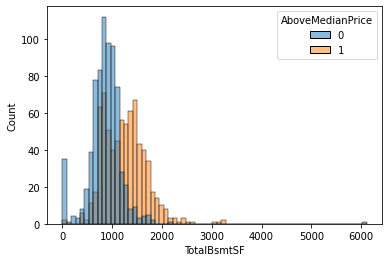

In [53]:
sns.histplot(x='TotalBsmtSF',hue='AboveMedianPrice',data=df)
#higher bsmtsf=higher above median price

<AxesSubplot:xlabel='FullBath', ylabel='count'>

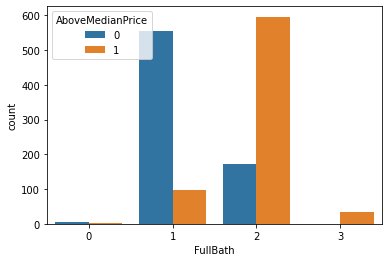

In [54]:
sns.countplot(x='FullBath',hue='AboveMedianPrice',data=df)
#higher full bath= above median

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

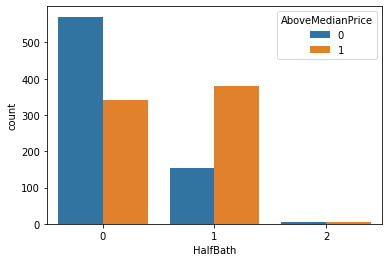

In [55]:
sns.countplot(x='HalfBath',hue='AboveMedianPrice',data=df)
#more half bath=above median price

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

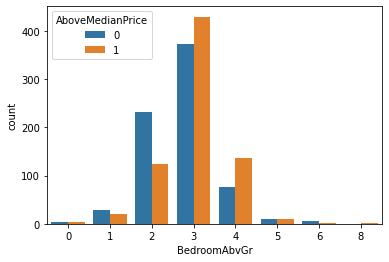

In [56]:
sns.countplot(x='BedroomAbvGr',hue='AboveMedianPrice',data=df)
#more=better

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

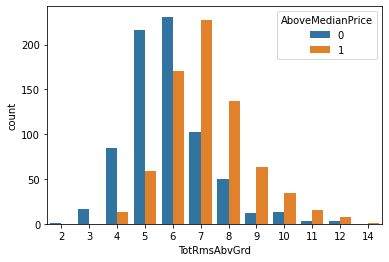

In [57]:
sns.countplot(x='TotRmsAbvGrd',hue='AboveMedianPrice',data=df)
#more is better

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

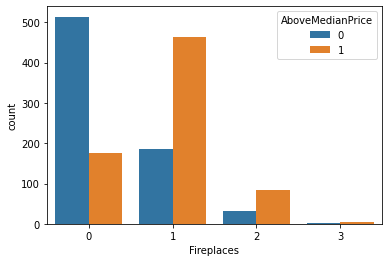

In [58]:
sns.countplot(x='Fireplaces',hue='AboveMedianPrice',data=df)
#more the better

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

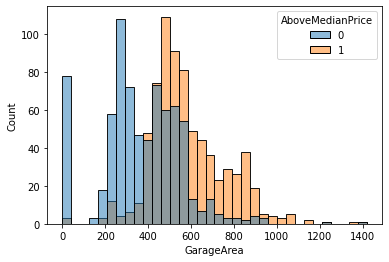

In [59]:
sns.histplot(x='GarageArea',hue='AboveMedianPrice',data=df)
#more the better

In [60]:
for i in range(df.shape[0]):
   if df['OverallCond'].iloc[i]<5 or df['OverallCond'].iloc[i]>5:
      df['OverallCond'].iloc[i]=0
   if df['OverallCond'].iloc[i]==5:
       df['OverallCond'].iloc[i]=1
#defining a feature in a better way

In [61]:
df=df.rename(columns={'OverallCond':'is it 5'})
#renaming column which is changed for better

In [62]:
df.head()
#head of data

,LotArea,OverallQual,is it 5,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,1,856,2,1,3,8,0,548,1
1,9600,6,0,1262,2,0,3,6,1,460,1
2,11250,7,1,920,2,1,3,6,1,608,1
3,9550,7,1,756,1,0,3,7,1,642,0
4,14260,8,1,1145,2,1,4,9,1,836,1


In [63]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.7*len(df)), int(.8*len(df))])
#splitting data

In [64]:
input_size=df.shape[1]-1
hidden_size=10
output_size=1
#defining size of neuron in a level

In [65]:
def random_initialization(a,s):
    return (np.random.random((a+1)*s).reshape(s,a+1))
#random initialization of weight matrix

In [66]:
theta_one=random_initialization(input_size,hidden_size)
theta_two=random_initialization(hidden_size,hidden_size)
theta_three=random_initialization(hidden_size,hidden_size)
theta_four=random_initialization(hidden_size,hidden_size)
theta_five=random_initialization(hidden_size,hidden_size)
theta_six=random_initialization(hidden_size,output_size)
#weight matrix

In [67]:
theta_one.shape,theta_two.shape,theta_three.shape,theta_four.shape,theta_five.shape,theta_six.shape
#shapes of all

((10, 11), (10, 11), (10, 11), (10, 11), (10, 11), (1, 11))

In [68]:
def inserting(s):
    return (np.insert(s,0,values=1,axis=1))
#function to insert bias

In [69]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
#sigmoid activation

In [70]:
def derived_sigmoid(z):
    return (np.multiply(sigmoid(z),(1-sigmoid(z))))
#derivative of sigmoid

In [71]:
X_train=train.drop('AboveMedianPrice',axis=1).values
X_validation=validate.drop('AboveMedianPrice',axis=1).values
X_test=test.drop('AboveMedianPrice',axis=1).values
y_train=train[['AboveMedianPrice']].values
y_validation=validate[['AboveMedianPrice']].values
y_test=test[['AboveMedianPrice']].values
#defining x and y

In [72]:
X_train.shape,X_validation.shape,X_test.shape
#shapes

((1021, 10), (147, 10), (292, 10))

In [73]:
def softmax(z):
    return (np.exp(z)/(np.sum(np.exp(z))))
#softmax...can be used for last layer

In [74]:
def forward_prop(x,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six):
    a1=inserting(x)#1021x11
    z2=np.dot(a1,theta_one.T)#1021x10
    a2=inserting(sigmoid(z2))#1021x11
    z3=np.dot(a2,theta_two.T)#1021x10
    a3=inserting(sigmoid(z3))#1021x11
    z4=np.dot(a3,theta_three.T)#1021x10
    a4=inserting(sigmoid(z4))#1021x11
    z5=np.dot(a4,theta_four.T)#1021x10
    a5=inserting(sigmoid(z5))#1021x11
    z6=np.dot(a5,theta_five.T)#1021x10
    a6=inserting(sigmoid(z6))#1021x11
    z7=np.dot(a6,theta_six.T)#1021x1
    h=sigmoid(z7)#1021x1
    return a1,z2,a2,z3,a3,z4,a4,z5,a5,z6,a6,z7,h
    #forward propogation

In [75]:
def cost(X,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six,Y):
    a1,z2,a2,z3,a3,z4,a4,z5,a5,z6,a6,z7,h=forward_prop(X,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six)
    first_term=np.dot(Y.T,np.log(h))
    m=len(X)
    second_term=np.dot((1-Y).T,np.log(1-h))
    total_term=(first_term+second_term)/(-m)
    lam=0.001
    reg_term=(lam/(2*m))
    term=np.sum(np.power(theta_one[:,1:],2))
    term=term+np.sum(np.power(theta_two[:,1:],2))
    term=term+np.sum(np.power(theta_three[:,1:],2))
    term=term+np.sum(np.power(theta_four[:,1:],2))
    term=term+np.sum(np.power(theta_five[:,1:],2))
    term=term+np.sum(np.power(theta_six[:,1:],2))
    term=term*reg_term
    return (total_term+term)
#cost function

In [76]:
cost(X_train,theta_one,theta_two, theta_three,theta_four,theta_five,theta_six,y_train)
#calling function just for checking

array([[2.83490322]])

In [77]:
def back_prop(theta_one,theta_two,theta_three,theta_four,theta_five,theta_six,Y,X):
   a1,z2,a2,z3,a3,z4,a4,z5,a6,z6,a6,z7,h=forward_prop(X,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six)
   del_seven=h-Y#1021x1
   z6t=inserting(z6)#1021x11
   del_six=np.multiply(np.dot(theta_six.T,del_seven.T).T,derived_sigmoid(z6t))#1021x11
   z5t=inserting(z5)#1021x11
   del_five=np.multiply(np.dot(theta_five.T,del_six[:,1:].T).T,derived_sigmoid(z5t))#1021x11
   z4t=inserting(z4)#1021x11
   del_four=np.multiply(np.dot(theta_four.T,del_five[:,1:].T).T,derived_sigmoid(z4t))#1021x11
   z3t=inserting(z3)#1021x11
   del_three=np.multiply(np.dot(theta_three.T,del_four[:,1:].T).T,derived_sigmoid(z3t))#1021x11
   z2t=inserting(z2)#1021x11
   del_two=np.multiply(np.dot(theta_two.T,del_three[:,1:].T).T,derived_sigmoid(z2t))#1021x11
   return del_seven,del_six,del_five,del_four,del_three,del_two
   #back propogation

In [101]:
def gradient_descent(X,Y,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six):
    m=len(X)
    alpha=0.00001
    lam=0.001
    reg=(lam/m)*alpha
    term_one=alpha/m
    costi=np.zeros(1000)
    for i in range(1000):
        a1,z2,a2,z3,a3,z4,a4,z5,a5,z6,a6,z7,h=forward_prop(X,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six)
        delta_one,delta_two,delta_three,delta_four,delta_five,delta_six=back_prop(theta_one,theta_two,theta_three,theta_four,theta_five,theta_six,Y,X)
        big_one=np.dot(delta_six[:,1:].T,a1)#10x11
        big_two=np.dot(delta_five[:,1:].T,a2)#10x11
        big_three=np.dot(delta_four[:,1:].T,a3)#10x11
        big_four=np.dot(delta_three[:,1:].T,a4)#10x11
        big_five=np.dot(delta_two[:,1:].T,a5)#10x11
        big_six=np.dot(delta_one.T,a6)#1x11
        big_one=big_one*term_one
        big_two=big_two*term_one
        big_three=big_three*term_one
        big_four=big_four*term_one
        big_five=big_five*term_one
        big_six=big_six*term_one
        big_one[:,1:]=big_one[:,1:]+(theta_one[:,1:]*reg)
        big_two[:,1:]=big_two[:,1:]+(theta_two[:,1:]*reg)
        big_three[:,1:]=big_three[:,1:]+(theta_three[:,1:]*reg)
        big_four[:,1:]=big_four[:,1:]+(theta_four[:,1:]*reg)
        big_five[:,1:]=big_five[:,1:]+(theta_five[:,1:]*reg)
        big_six[:,1:]=big_six[:,1:]+(theta_six[:,1:]*reg)
        theta_one=theta_one-big_one
        theta_two=theta_two-big_two
        theta_three=theta_three-big_three
        theta_four=theta_four-big_four
        theta_five=theta_five-big_five
        theta_six=theta_six-big_six
        a1,z2,a2,z3,a3,z4,a4,z5,a5,z6,a6,z7,h=forward_prop(X,theta_one,theta_two,theta_three,theta_four,theta_five,theta_six)
        costi[i]=cost( X, theta_one, theta_two, theta_three,theta_four,theta_five,theta_six,Y)
    return theta_one,theta_two,theta_three,theta_four,theta_five,theta_six,h,costi
    #gradient descent

In [87]:
a,b,c,h,er,fg,g,costi=gradient_descent(X_train, y_train, theta_one, theta_two, theta_three,theta_four,theta_five,theta_six)

In [89]:
costi[9],costi[99],costi[999],costi[9999],costi[19999],costi[49999]
#cost function is converging

(2.834629000727346,
 2.832161121280333,
 2.807492327341519,
 2.5620054277653357,
 2.2929150076568034,
 1.5412799692276107)

In [90]:
stage_1=np.dot(inserting(X_validation),a.T)
stage_2=np.dot(inserting(X_validation),b.T)
stage_3=np.dot(inserting(X_validation),c.T)
stage_4=np.dot(inserting(X_validation),h.T)
stage_5=np.dot(inserting(X_validation),er.T)
stage_6=np.dot(inserting(X_validation),fg.T)
#for validation set

In [91]:
stage_6
#answer for validation set....but it will take lot of iteration to converge

array([[ 928.31197963],
       [ 804.34680214],
       [2060.1901602 ],
       [ 868.87231252],
       [1450.18583349],
       [1512.36084232],
       [ 927.41010916],
       [1544.05613276],
       [1149.49797438],
       [1519.51964008],
       [ 917.76271472],
       [ 883.6006954 ],
       [ 757.15730807],
       [1334.56760366],
       [1117.45244532],
       [1764.63562433],
       [ 997.43888258],
       [ 855.95404366],
       [1652.77337342],
       [5848.07972011],
       [1115.75920936],
       [ 612.09866482],
       [2152.61176891],
       [1083.15599735],
       [1685.03533233],
       [1072.13770095],
       [1174.39578911],
       [1550.11265881],
       [1301.39301863],
       [1690.09985292],
       [1219.04194444],
       [1775.03979055],
       [1268.07399329],
       [ 682.86111695],
       [2217.44818776],
       [ 826.52888375],
       [1179.19356644],
       [ 921.78671995],
       [ 275.88860196],
       [1292.58028797],
       [1270.73469346],
       [1728.740

In [83]:
# this will get converge but it will take a lot of iteration...so i couldn't do it. you can try to find this by taking less no.data points which will converge on very less iteration as compare to others